## Introducción
La industria de los videojuegos es un sector amplio y en constante crecimiento, impulsado por avances tecnológicos que han hecho que los videojuegos sean cada vez más accesibles. En este proyecto, se analizaron las ventas de videojuegos desde 1980 hasta 2016, centrándose en las cifras de ventas, las plataformas, los géneros y las regiones. El objetivo fue identificar patrones y obtener información clave para comprender qué juegos tienen éxito, qué plataformas son las más populares y cuáles son los productores que dominan el mercado. Además, se examinó cómo estas variables varían según las regiones, incluyendo Norteamérica, Europa, Japón y el resto del mundo. Los conocimientos adquiridos en este análisis aportan una comprensión más profunda sobre los factores que contribuyen al éxito de los videojuegos en esta industria.

### Validación de Datos

El conjunto de datos inicial contenía 16,598 filas y 11 columnas antes de los procesos de limpieza y validación. A continuación, se detalla la información de las variables incluidas:
1. Rank: Clasificación basada en las ventas globales. Sin valores faltantes (el mismo juego en diferentes plataformas se cuenta como valores distintos).
2. Name: Nombre del videojuego. Sin valores faltantes.
3. Platform: Plataforma en la que se lanzó el juego (ej. PC, PS4, etc.). Sin valores faltantes.
4. Year: Año de lanzamiento del juego. 271 valores faltantes, que se eliminaron durante el proceso de limpieza.
5. Genre: Género del juego. Sin valores faltantes.
6. Publisher: Editor del juego. 58 valores faltantes, eliminados en el proceso de limpieza.
7. NA_Sales: Ventas en Norteamérica (en millones). Sin valores faltantes.
8. EU_Sales: Ventas en Europa (en millones). Sin valores faltantes.
9. JP_Sales: Ventas en Japón (en millones). Sin valores faltantes.
10. Other_Sales: Ventas en el resto del mundo (en millones). Sin valores faltantes.
11. Global_Sales: Ventas totales a nivel mundial. Sin valores faltantes.

## Carga de Librerías

In [1]:
import numpy as np # Simplifica el manejo de arreglos y matrices
import pandas as pd # Analizar, transformar y manipular información fácilmente
import matplotlib.pyplot as plt # Crear gráficos y visualizaciones
import seaborn as sns # Gráficos atractivos y fáciles de interpretar
from IPython.display import Image # Mostrar imágenes en Jupyter Notebook

In [2]:
# Import os lo utilizo para interactuar con el sistema manejando rutas de archivos y directorios.
import os
for dirname, _, filenames in os.walk('/Kaggle-Video_game_sales/Datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Kaggle-Video_game_sales/Datasets\vgsales.csv
/Kaggle-Video_game_sales/Datasets\vgsales_final.csv


In [4]:
### Cargamos el dataset ###
df = pd.read_csv("/Kaggle-Video_game_sales/Datasets/vgsales.csv")

## Interactuamos con el DataSet

In [6]:
df.head() # Muestra las primeras 5 filas del DataFrame

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
df.duplicated() # Verifica si hay filas duplicadas en el DataFrame

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16598, dtype: bool

In [8]:
df.tail() # Muestra las últimas 5 filas del DataFrame

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [9]:
df.info() # Información general del DataFrame, incluyendo tipos de datos y valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
df.columns # Muestra los nombres de las columnas del DataFrame

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [11]:
df.shape # Muestra la forma del DataFrame (filas, columnas)

(16598, 11)

In [9]:
df.describe().T # Estadísticas descriptivas de las columnas numéricas del DataFrame

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


### Detección de valores faltantes

In [10]:
from IPython.display import HTML # Muestra una imagen de un GIF utilizando HTML

HTML('<img src="https://i.giphy.com/l2JehQ2GitHGdVG9y.webp" width="500">')


In [13]:
df.isnull().sum() # Muestra la cantidad de valores nulos en cada columna del DataFrame

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [14]:
df["Year"] = df["Year"].fillna(df["Year"].quantile(0.50)) # Rellena los valores nulos en la columna "Year" con la mediana de esa columna

In [15]:
df["Year"].isnull().all() # Verifica si hay valores nulos en la columna "Year" después de rellenar

np.False_

In [16]:
df["Year"] = df["Year"].astype("int64") # Convierte la columna "Year" a tipo entero

In [17]:
df.dropna(subset=["Publisher"], inplace=True) # Elimina los valores nulos en la columna "Publisher" del DataFrame

In [18]:
df.isnull().sum() # Muestra la cantidad de valores nulos en cada columna del DataFrame

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [44]:
df.shape # Muestra la forma del DataFrame (filas, columnas)

(16540, 11)

In [20]:
for i,j in zip(df.dtypes.index,df.dtypes): # Recorre los tipos de datos de cada columna
    if j == "object": # Si el tipo de dato es "object"
        
        print("\n"*3,i +":","\n",df[i].value_counts()) # Muestra la cantidad de valores únicos en la columna
    if j == "object" and i != "Publisher": # Si el tipo de dato es "object" y la columna no es "Publisher"
        print("\n"*3,i +":","\n",df[i].unique()) # Muestra los valores únicos en la columna




 Name: 
 Name
Need for Speed: Most Wanted    12
FIFA 14                         9
Ratatouille                     9
Madden NFL 07                   9
LEGO Marvel Super Heroes        9
                               ..
New Super Mario Bros.           1
Pokemon Red/Pokemon Blue        1
Wii Sports Resort               1
Mario Kart Wii                  1
Wii Sports                      1
Name: count, Length: 11442, dtype: int64



 Name: 
 ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ... 'Plushees'
 'Woody Woodpecker in Crazy Castle 5' 'Know How 2']



 Platform: 
 Platform
PS2     2159
DS      2156
PS3     1326
Wii     1324
X360    1261
PSP     1211
PS      1193
PC       954
XB       824
GBA      796
GC       556
3DS      507
PSV      411
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: coun

## Detección de valores Outliers y limpieza

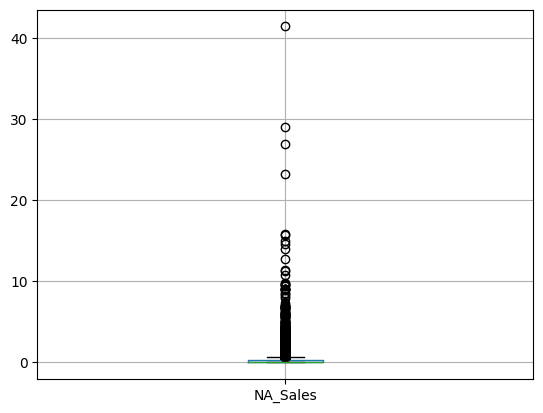

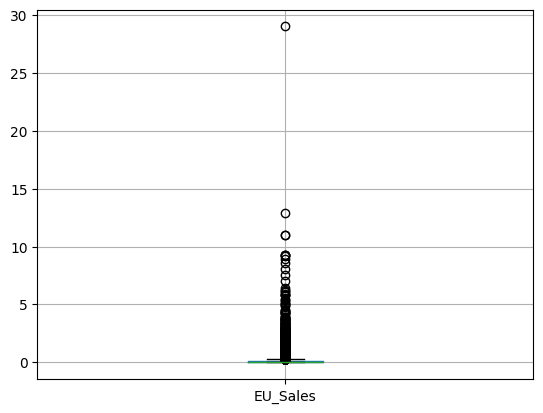

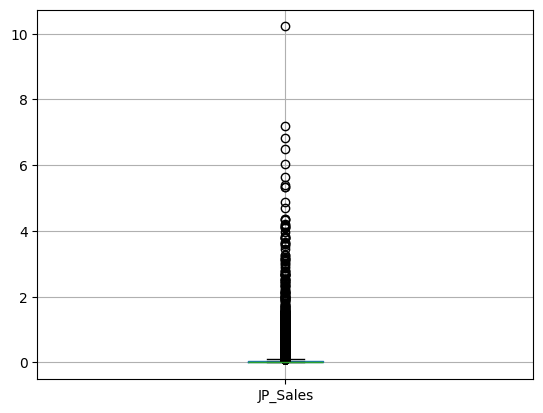

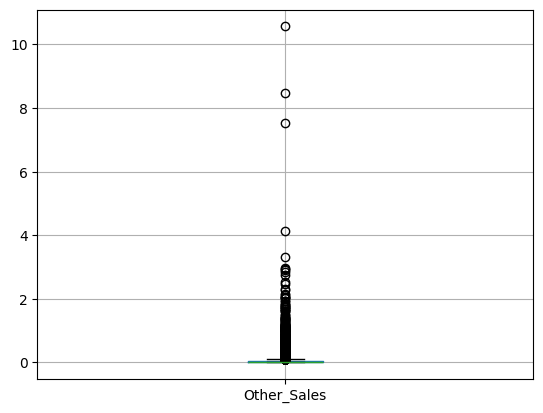

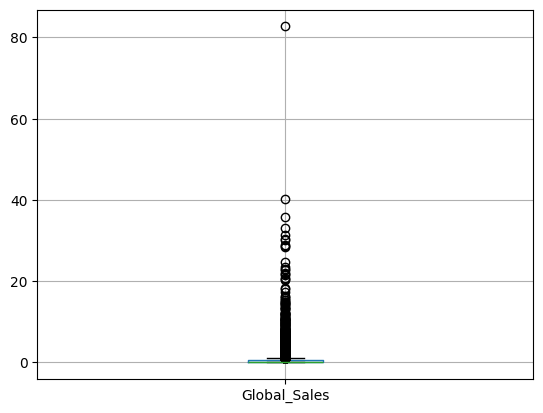

In [21]:
for i,j in zip(df.dtypes.index,df.dtypes): # Recorre los tipos de datos de cada columna
    if j == "int64" or j == "float64": # Si el tipo de dato es "int64" o "float64"
        if i == "Rank" or i == "Year": # Si la columna es "Rank" o "Year"
            pass
        else:
            df.boxplot(i) # Crea un boxplot de la columna
            plt.show() # Muestra el boxplot

In [22]:
def lower_outliers(x):
    """
    x : Por favor, proporcione una variable
    
    return: devuelve el lower_limit
    """
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = 1.5 * (Q3 - Q1)
    
    lower_limit = Q1 - IQR
    
    return lower_limit

In [23]:
def upper_outliers(x): # Definición de la función upper_outliers
    
    """
    x : Proporcione una variable 
    
    return: devuelve upper_limit
    """
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = 1.5 * (Q3 - Q1)
    
    upper_limit = Q3 + IQR
    
    return upper_limit

In [38]:
df_NaSales = df["NA_Sales"] # Selecciona la columna "NA_Sales" del DataFrame
print("Lower limit : {}".format(lower_outliers(df_NaSales))) # Imprime el límite inferior de la columna "NA_Sales"
print("Upper limit : {}".format(upper_outliers(df_NaSales))) # Imprime el límite superior de la columna "NA_Sales"

Lower limit : -0.36
Upper limit : 0.6


In [37]:
for i,j in zip(df.dtypes.index,df.dtypes): # Recorre los tipos de datos de cada columna
    if j == "int64" or j == "float64":
        if i == "Rank" or i == "Year":
            pass
        else:
            print("{} Lower limit : {}".format(i,lower_outliers(df[i])))
            print("{} Upper limit : {}".format(i,upper_outliers(df[i])))

NA_Sales Lower limit : -0.36
NA_Sales Upper limit : 0.6
EU_Sales Lower limit : -0.165
EU_Sales Upper limit : 0.275
JP_Sales Lower limit : -0.06
JP_Sales Upper limit : 0.1
Other_Sales Lower limit : -0.06
Other_Sales Upper limit : 0.1
Global_Sales Lower limit : -0.5700000000000001
Global_Sales Upper limit : 1.1099999999999999


In [26]:
df.shape # Muestra la forma del DataFrame (filas, columnas)

(16540, 11)

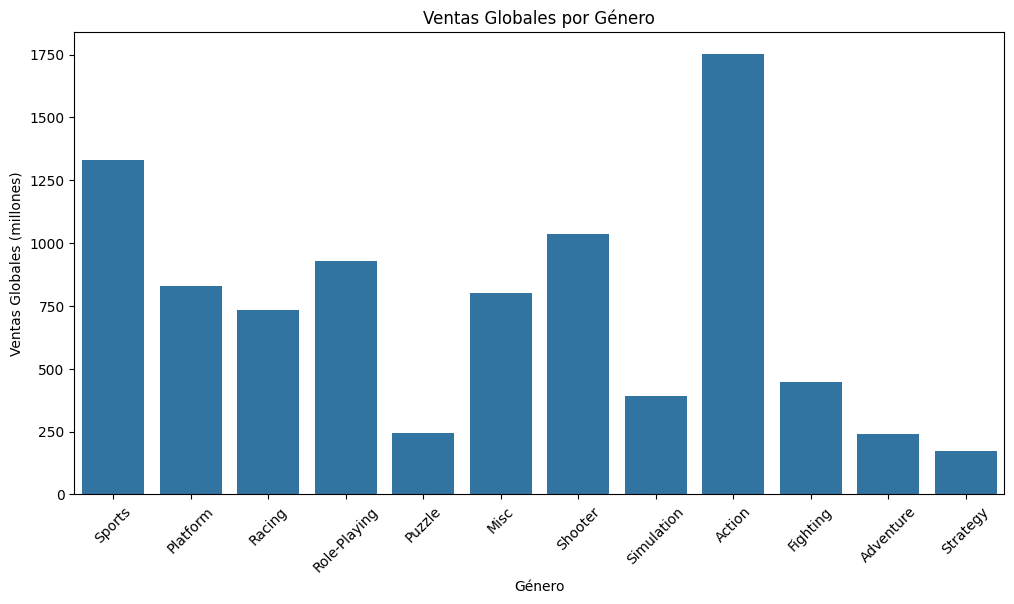

In [27]:
plt.figure(figsize=(12, 6))

# Usar errorbar=None en lugar de ci=None
sns.barplot(
    x=df['Genre'], 
    y=df['Global_Sales'], 
    estimator=sum, 
    errorbar=None  # Reemplaza el parámetro obsoleto
)

plt.xticks(rotation=45)
plt.title('Ventas Globales por Género')
plt.ylabel('Ventas Globales (millones)')
plt.xlabel('Género')
plt.show()

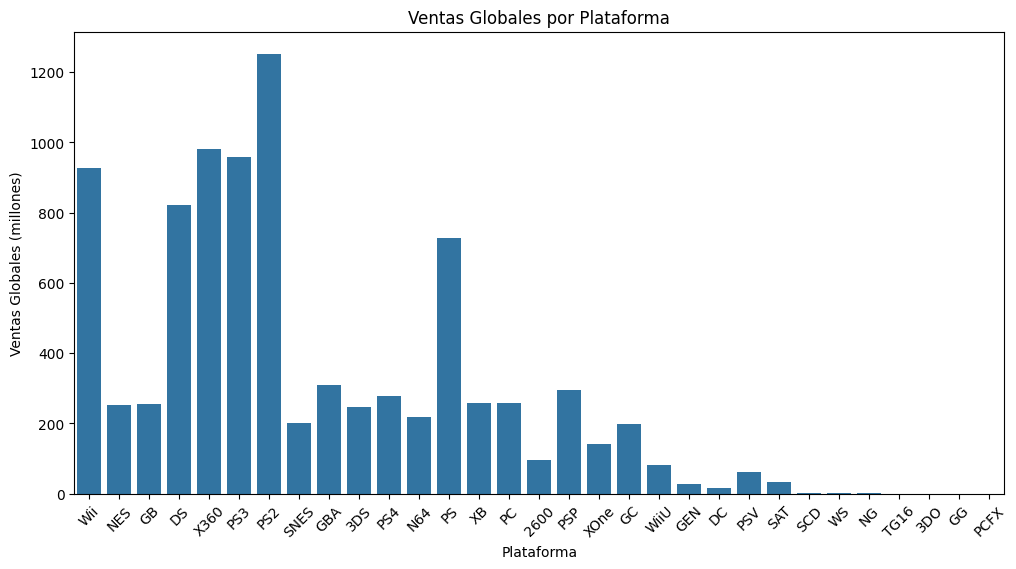

In [25]:
plt.figure(figsize=(12, 6))

# Gráfico con ajustes actualizados
sns.barplot(
    data=df, 
    x="Platform", 
    y="Global_Sales", 
    estimator=sum, 
    errorbar=None, 
)

plt.xticks(rotation=45)
plt.title("Ventas Globales por Plataforma")
plt.ylabel("Ventas Globales (millones)")
plt.xlabel("Plataforma")
plt.show()

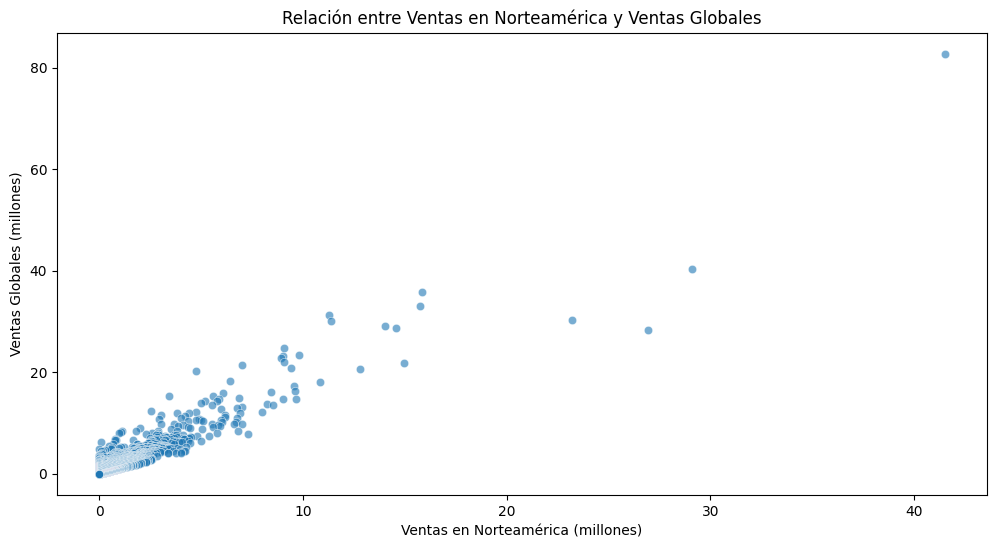

In [25]:
plt.figure(figsize=(12, 6))

# Gráfico de dispersión
sns.scatterplot(data=df, x='NA_Sales', y='Global_Sales', alpha=0.6)

plt.title('Relación entre Ventas en Norteamérica y Ventas Globales')
plt.xlabel('Ventas en Norteamérica (millones)')
plt.ylabel('Ventas Globales (millones)')
plt.show()

In [28]:
df.shape # Muestra la forma del DataFrame (filas, columnas)

(16540, 11)

In [ ]:
# Lista de columnas con outliers (adaptada a las columnas existentes en df)
columns_with_outliers = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Definir una función para eliminar los outliers basados en el IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Eliminar outliers en las columnas especificadas
for col in columns_with_outliers:
    df = remove_outliers(df, col)

# Ahora df no tiene outliers en las columnas especificadas

In [34]:
# Lista de columnas con outliers (adaptada a las columnas existentes en df)
columns_with_outliers = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Definir una función para eliminar solo los outliers por debajo del límite inferior
def remove_lower_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    df = df[df[column] >= lower_bound]
    return df

# Aplicar la función para eliminar los outliers inferiores en las columnas especificadas
for col in columns_with_outliers:
    df = remove_lower_outliers(df, col)

# Ahora df no tiene outliers inferiores en las columnas especificadas

In [35]:
df.shape # Muestra la forma del DataFrame (filas, columnas)

(16540, 11)

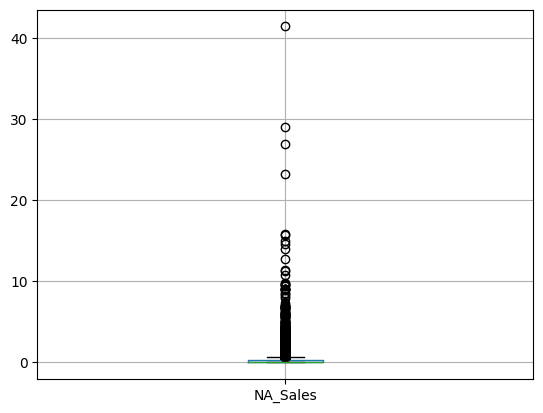

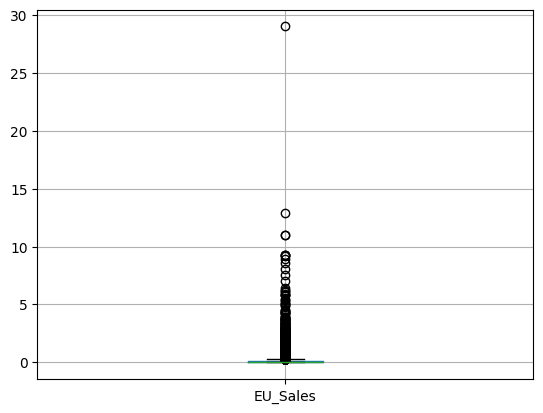

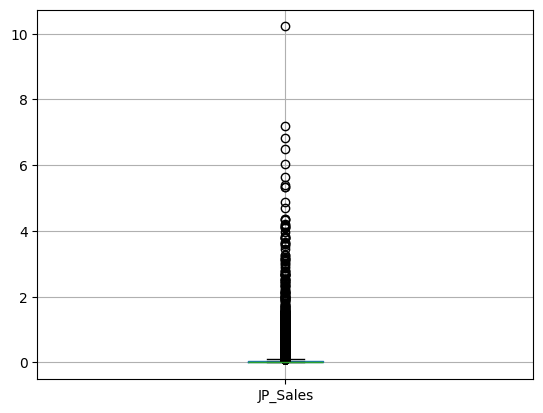

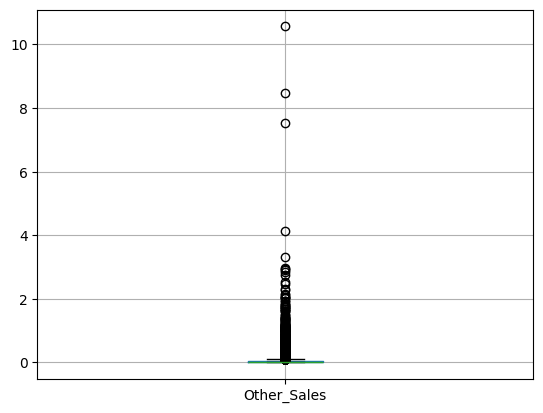

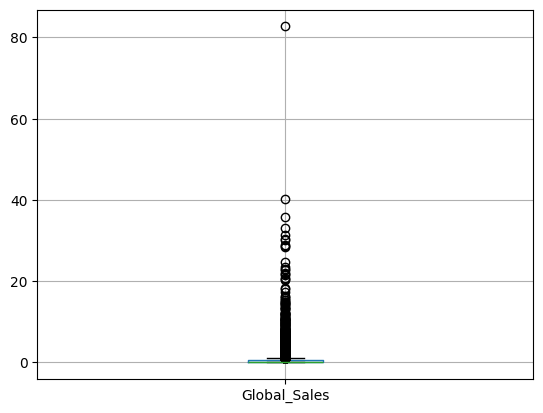

In [39]:
for i,j in zip(df.dtypes.index,df.dtypes): # Recorre los tipos de datos de cada columna
    if j == "int64" or j == "float64": # Si el tipo de dato es "int64" o "float64"
        if i == "Rank" or i == "Year": # Si la columna es "Rank" o "Year"
            pass
        else:
            df.boxplot(i) # Crea un boxplot de la columna
            plt.show() # Muestra el boxplot

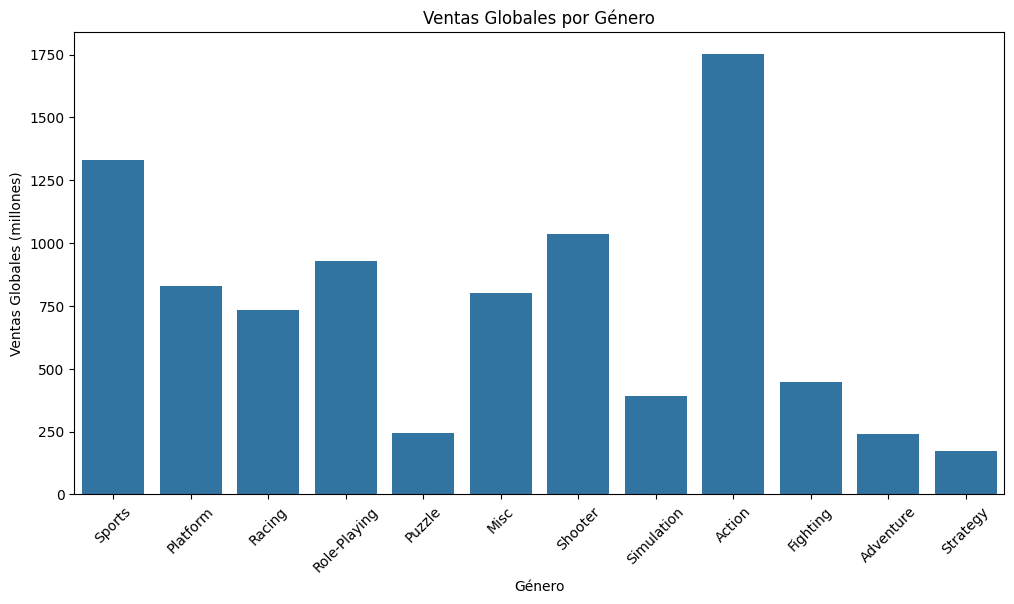

In [40]:
plt.figure(figsize=(12, 6))

# Usar errorbar=None en lugar de ci=None
sns.barplot(
    x=df['Genre'], 
    y=df['Global_Sales'], 
    estimator=sum, 
    errorbar=None  # Reemplaza el parámetro obsoleto
)

plt.xticks(rotation=45)
plt.title('Ventas Globales por Género')
plt.ylabel('Ventas Globales (millones)')
plt.xlabel('Género')
plt.show()

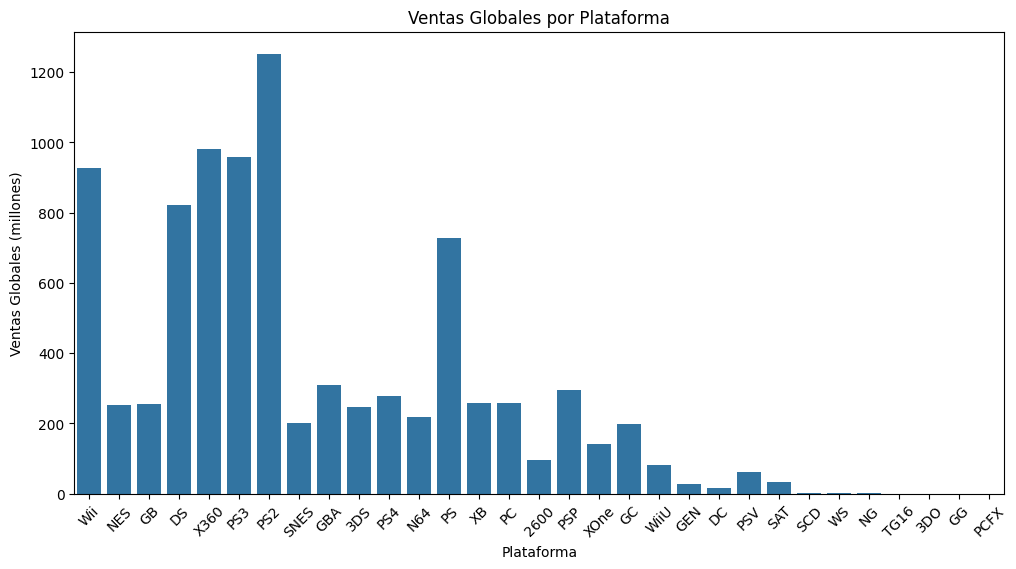

In [41]:
plt.figure(figsize=(12, 6))

# Gráfico con ajustes actualizados
sns.barplot(
    data=df, 
    x="Platform", 
    y="Global_Sales", 
    estimator=sum, 
    errorbar=None, 
)

plt.xticks(rotation=45)
plt.title("Ventas Globales por Plataforma")
plt.ylabel("Ventas Globales (millones)")
plt.xlabel("Plataforma")
plt.show()

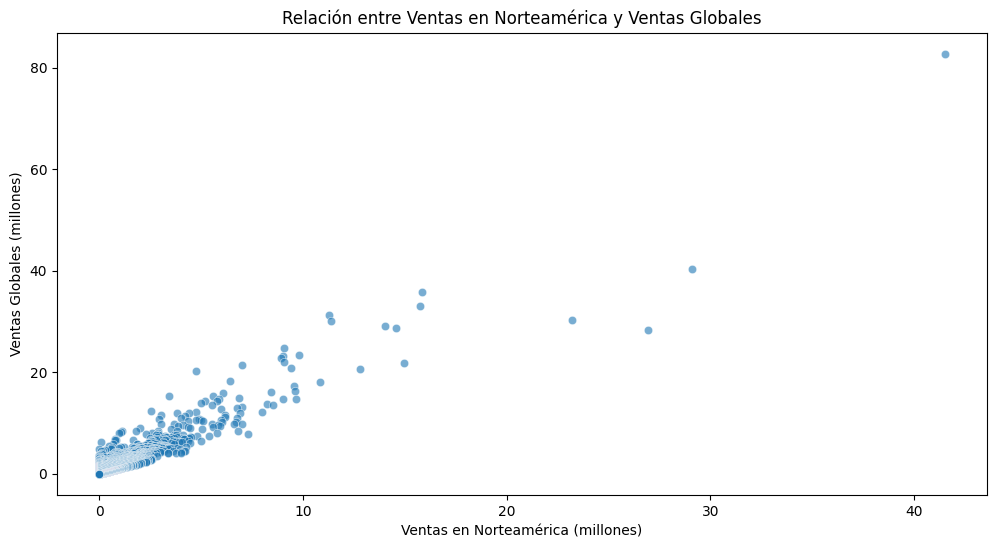

In [42]:
plt.figure(figsize=(12, 6))

# Gráfico de dispersión
sns.scatterplot(data=df, x='NA_Sales', y='Global_Sales', alpha=0.6)

plt.title('Relación entre Ventas en Norteamérica y Ventas Globales')
plt.xlabel('Ventas en Norteamérica (millones)')
plt.ylabel('Ventas Globales (millones)')
plt.show()

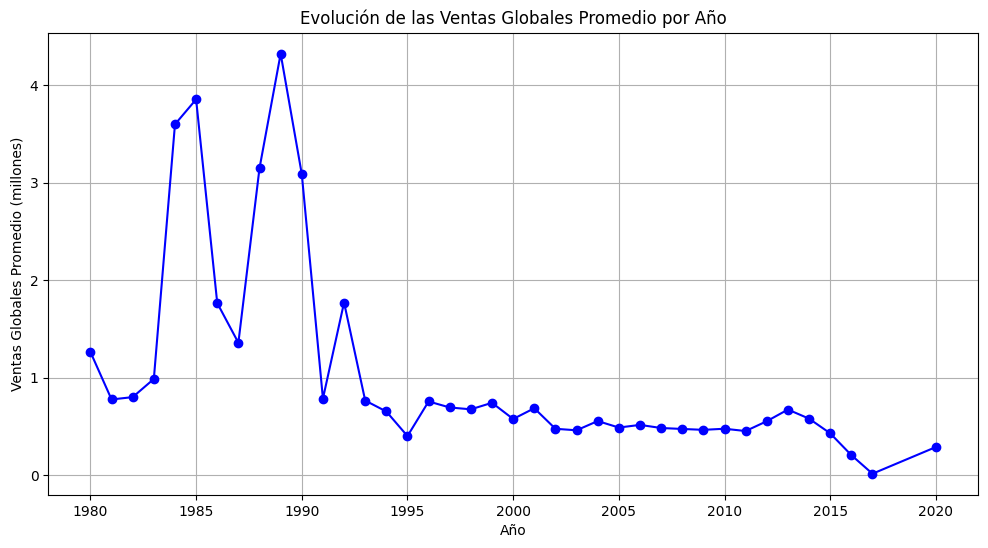

In [43]:
# Agrupar por año y calcular las ventas globales promedio
sales_by_year = df.groupby('Year')['Global_Sales'].mean()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sales_by_year.plot(kind='line', marker='o', color='b')

plt.title('Evolución de las Ventas Globales Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Globales Promedio (millones)')
plt.grid(True)
plt.show()

### Exportamos el Dataset Limpio

In [45]:
df.to_csv("/Kaggle-Video_game_sales/Datasets/vgsales_finalv2.csv", index=False) # Guarda el DataFrame limpio en un nuevo archivo CSV